In [20]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import Adagrad
from keras.optimizers import SGD
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [21]:
seed = 11
numpy.random.seed(seed)

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]

In [23]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:
def baseline_model():
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(400, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	#adagrad = Adagrad(lr=0.02, epsilon=None, decay=0.0)
	sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
	return model

In [25]:
model = baseline_model()

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 0.6418 - acc: 0.8153 - val_loss: 0.2938 - val_acc: 0.9191
Epoch 2/10
 - 38s - loss: 0.3212 - acc: 0.9059 - val_loss: 0.2289 - val_acc: 0.9357
Epoch 3/10
 - 33s - loss: 0.2573 - acc: 0.9253 - val_loss: 0.1940 - val_acc: 0.9441
Epoch 4/10
 - 37s - loss: 0.2172 - acc: 0.9374 - val_loss: 0.1664 - val_acc: 0.9527
Epoch 5/10
 - 40s - loss: 0.1894 - acc: 0.9453 - val_loss: 0.1500 - val_acc: 0.9559
Epoch 6/10
 - 34s - loss: 0.1708 - acc: 0.9506 - val_loss: 0.1388 - val_acc: 0.9590
Epoch 7/10
 - 41s - loss: 0.1536 - acc: 0.9550 - val_loss: 0.1252 - val_acc: 0.9614
Epoch 8/10
 - 50s - loss: 0.1418 - acc: 0.9586 - val_loss: 0.1157 - val_acc: 0.9637
Epoch 9/10
 - 38s - loss: 0.1299 - acc: 0.9620 - val_loss: 0.1086 - val_acc: 0.9669
Epoch 10/10
 - 38s - loss: 0.1209 - acc: 0.9650 - val_loss: 0.1026 - val_acc: 0.9681


In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Test accuracy: %.2f%%" % (scores[1]*100))

Baseline Error: 3.19%
Test accuracy: 96.81%


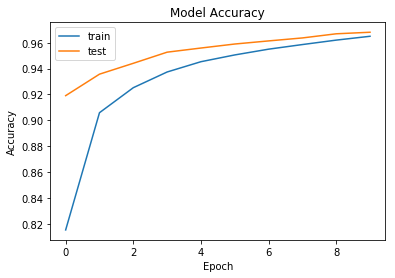

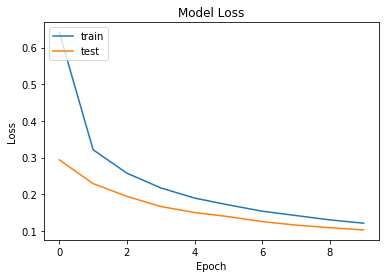

In [28]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                4010      
Total params: 933,450
Trainable params: 933,450
Non-trainable params: 0
_________________________________________________________________
